# Name : Vaishnavi Dadmode
LETS GROW MORE (VIP)

Data Science Intern (October 2021)

Beginner Level : Task 2

Music Recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Recommenders as Recommenders

In [2]:
song_data_1=pd.read_csv('triplets_file.csv')
song_data_1.head()


,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [3]:
len(song_data_1)

2000000

In [4]:
song_data_2=pd.read_csv('song_data.csv')
song_data_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [5]:
len(song_data_2)

1000000

# Merging two dataframes and dropping duplicates(if any)

In [6]:
song_data=pd.merge(song_data_1,song_data_2.drop_duplicates(['song_id']),on='song_id',how='left')
song_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [7]:
len(song_data)


2000000

# Data Preprocessing

In [8]:
song_data['song']=song_data['title']+" - "+song_data['artist_name']
song_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [9]:
#taking top 10k samples foe quick results
song_data = song_data.head(10000)

In [10]:
# cummulative sum of listen count of the songs
song_grouped = song_data.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [11]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])


,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


# Data Visualisation

Correlation between features

In [12]:
song_data.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'song'],
      dtype='object')

In [13]:
song_corr=song_data.corr()
print(song_corr)

              listen_count      year
listen_count      1.000000 -0.017674
year             -0.017674  1.000000


Text(0.5, 1.0, 'Most listened songs')

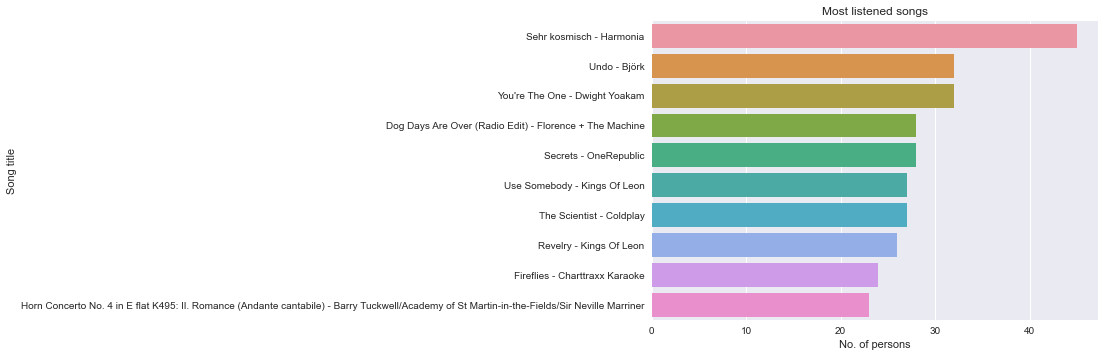

In [14]:
#Top 10
plt.style.use('seaborn')
sns.barplot(x=song_data['song'].value_counts()[:10].values,y=song_data['song'].value_counts()[:10].index)
plt.xlabel('No. of persons')
plt.ylabel('Song title')
plt.title('Most listened songs')

# Reducing the size of dataset

In [15]:
song_data=song_data.head(100000)

# Sum of listen_count of different songs

In [16]:
song_grouped=song_data.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


# Most listened songs and their corresponding percentage

In [17]:
grouped_sum=song_grouped['listen_count'].sum()
song_grouped['percentage']=(song_grouped['listen_count']/grouped_sum)*100
song_grouped.sort_values(['listen_count','song'],ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


# Recommendation Engine based on Popularity of Songs

In [18]:
pr = Recommenders.popularity_recommender_py()

In [19]:
pr.create(song_data, 'user_id', 'song')

In [20]:
# display the top 10 popular songs
pr.recommend(song_data['user_id'][5])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4378,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [21]:
pr.recommend(song_data['user_id'][100])

,user_id,song,score,Rank
3660,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,45,1.0
4678,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,32,2.0
5105,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,32,3.0
1071,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,28,5.0
4378,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,27,6.0
4712,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,27,7.0
3476,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,26,8.0
1387,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,24,9.0
1862,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


#  Similarity Recommendation

In [22]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(song_data, 'user_id', 'song')

In [23]:
user_items = ir.get_user_items(song_data['user_id'][5])

In [24]:
# display user songs history
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [25]:
# give song recommendation for that user
ir.recommend(song_data['user_id'][5])

No. of unique songs for the user: 45
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :6844


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The End - Pearl Jam,0.037531,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,St. Elsewhere - Dave Grusin,0.037531,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Misled - Céline Dion,0.037531,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oil And Water - Incubus,0.037531,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.037531,10


In [26]:
# give related songs based on the words
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :75


,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,0.75,1
1,,St. Elsewhere - Dave Grusin,0.75,2
2,,Misled - Céline Dion,0.75,3
3,,Your Protector - Fleet Foxes,0.75,4
4,,Oil And Water - Incubus,0.75,5
5,,Tiger Mountain Peasant Song - Fleet Foxes,0.75,6
6,,Meadowlarks - Fleet Foxes,0.75,7
7,,Sun It Rises - Fleet Foxes,0.75,8
8,,Id Die Without You - P.M. Dawn,0.75,9
9,,Meet Virginia - Train,0.75,10


# Thank You